In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

In [2]:
# Idea is to plot line of best fit with smallest difference between predicted point and actual point.
# Loss function is Sum of Squared Errors, and we can achieve lowest Sum of Squared Errors either with Least Squares algorithm or Gradient Descent.

In [3]:
# Formula of linear regression with multiple independent variables (X-features) and their respecitve gradients/weights
# y= θ0 + θ1X1 + θ2x2 .... + θnXn
# θ0 = this is y-intercept or bias.
# this formula plots a linear graph

# The sum of squared errors = Σ(yi - yp)^2
#  = Σ(yi - (intercept + θ1X1 + θ2x2 .... + θnXn))^2

In [462]:
# Generate random data
x = np.linspace(0, 10, 50)
y = np.random.randint(20, 70, 50) * x + 50

Text(0.5, 1.0, 'Plot Y against X values')

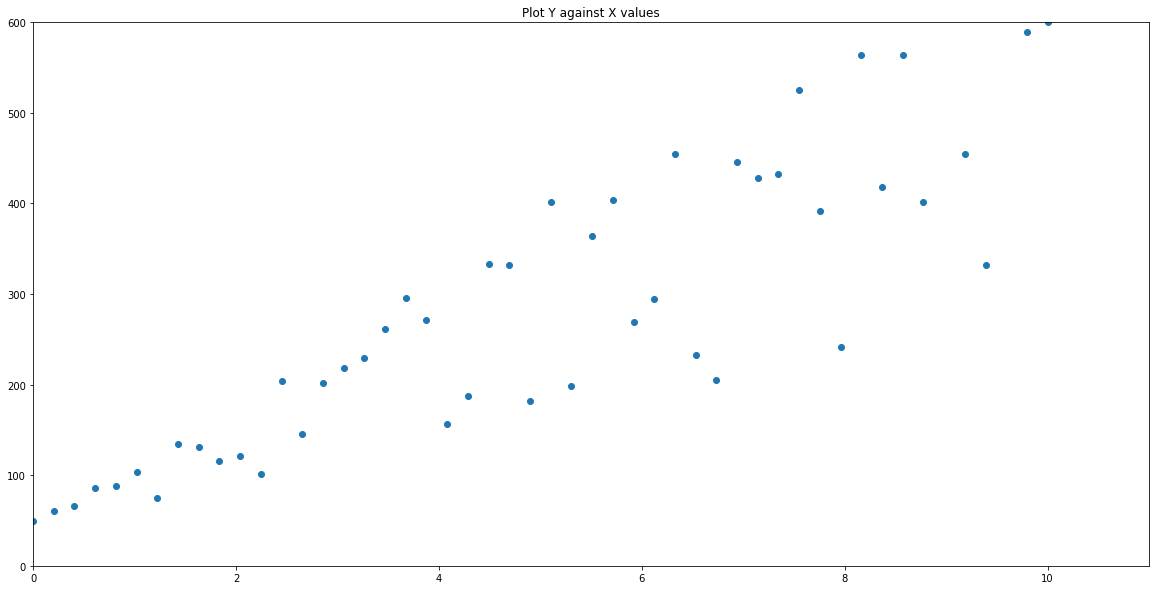

In [463]:
plt.scatter(x, y)
plt.axis([0, 11, 0, 600])
plt.title("Plot Y against X values")

In [472]:
class GradientDescentUnivariateEquation:
    
    def __init__(self, x, y):
        self.x = x
        self.y = y
        # random value for intercept let be 0
        self.intercept = 0
        # random value for slope/grad let be 0.64
        self.gradient = 0.64
        self.learn_rate = 0.0001
        
    def differentiateParamWithRespectToIntercept(self):
        # taking derivative of the loss function (sum of squared errors) with respect to intercept
        #form = (y - (self.intercept + self.gradient * self.x))**2
        
        grad = 0
        for y, x in zip(self.y, self.x):
            grad += -2 * (y - (self.intercept + self.gradient*x))

        step_size = grad * self.learn_rate
        self.intercept = self.intercept - (step_size)
            
        
        return grad
            
        
    
    # Because differentiaion with respect to X will be the same for each 
    # feature and its weight, hence why we just one function
    def differentiateParamWithRespectToX(self):
        grad = 0
        for y, x in zip(self.y, self.x):
            grad += 2 * -(x) * (y - (self.intercept + self.gradient*x))

        step_size = grad * self.learn_rate
        self.gradient = self.gradient - (step_size)
            
        
        return grad
        
    
    def minimiseLossFunction(self):
        
        counter = 0
        
        grad1 = float("inf")
        grad2 = float("inf")
        
        while counter < 10000 and (abs(grad1) > 0.1 or abs(grad2) > 0.1):
            gradIntercept = self.differentiateParamWithRespectToIntercept()
            gradFeature = self.differentiateParamWithRespectToX()
            grad1 = gradIntercept
            grad2 = gradFeature
            counter += 1
            if counter % 20 == 0 or counter == 1:
                print("\n{} counter, intercept gradient: {}, feature gradient: {}".format(str(counter), str(gradIntercept), str(gradFeature)))
                print("\nIntercept value: {}, Feature weight value: {}".format(str(self.intercept), str(self.gradient)))
        
        return gradIntercept, gradFeature, self.gradient, self.intercept
            
        
        
        
        
        

In [473]:
obj1 = GradientDescentUnivariateEquation(x, y)

In [490]:
gd1, gd2, featureGrad, intercept = obj1.minimiseLossFunction()


1 counter, intercept gradient: -0.0988507033124506, feature gradient: 0.014751775199101758

Intercept value: 41.091433731750094, Feature weight value: 50.389679319386026


Text(0.5, 1.0, 'Gradient Descent Line Of Best Fit')

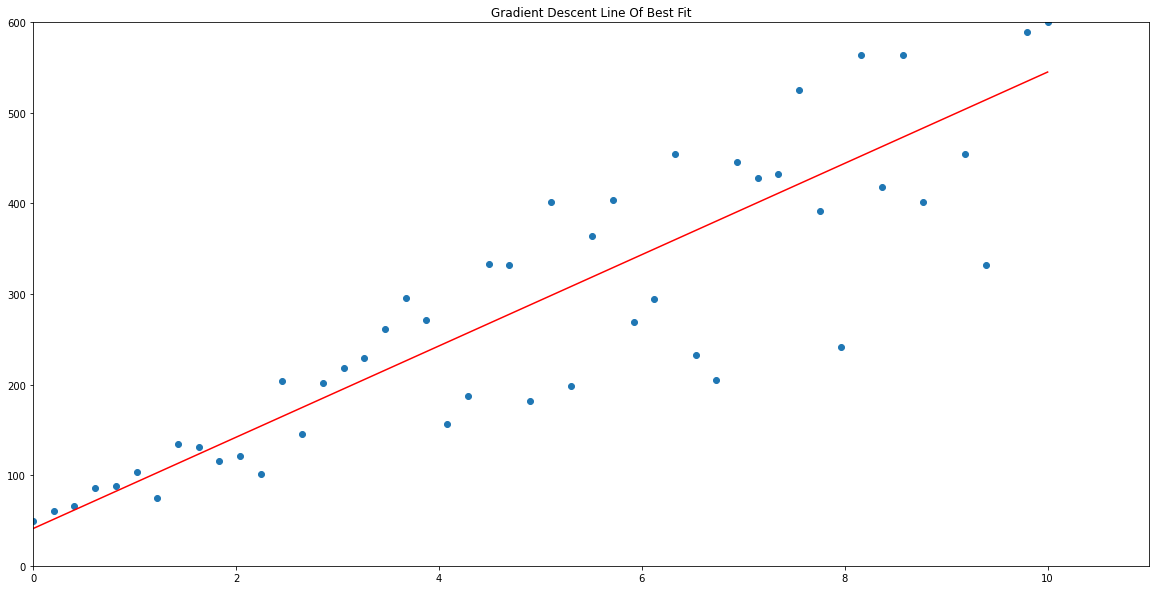

In [496]:
# Plot the line of best fit with found best intercept and gradient for the data given
plt.rcParams["figure.figsize"] = (20,10)
plt.scatter(x, y)
plt.axis([0, 11, 0, 600])

newY = featureGrad * x + intercept
plt.plot(x, newY, "r-")
plt.title("Gradient Descent Line Of Best Fit")

In [479]:
# finding the optimal Intercept and Feature gradient to minimise the loss function using Least Squares formula

class LeastSquaresUnivariateEquation:
    
    def __init__(self, x, y):
        self.x = x
        self.y = y
        self.gradient = None
        self.intercept = None
        self.sumOfXY = sum(self.x * self.y)
        self.sumOfX = sum(self.x)
        self.sumOfY = sum(self.y)
        self.sumOfXsquared = sum(self.x ** 2)
        self.squaredSumOfX = self.sumOfX ** 2
        self.numElements = len(self.x)
        
    def calculateGradient(self):

        
        self.gradient = (self.numElements * self.sumOfXY - self.sumOfX * self.sumOfY)/(self.numElements * self.sumOfXsquared - self.squaredSumOfX)
        
        return self.gradient
    
    def calculateIntercept(self):
        if self.gradient is None:
            return print("Please calculate the gradient first and then the intercept")
        else:
            self.intercept = (self.sumOfY - self.gradient * self.sumOfX) / self.numElements
            
            return self.intercept
        
        
        
        
        



In [482]:
obj2 = LeastSquaresUnivariateEquation(x, y)

In [491]:
gradientLS = obj2.calculateGradient()
gradientLS

50.38909963985594

In [492]:
interceptLS = obj2.calculateIntercept()
interceptLS

41.095318127250906

Text(0.5, 1.0, 'Least Squares Line Of Best Fit')

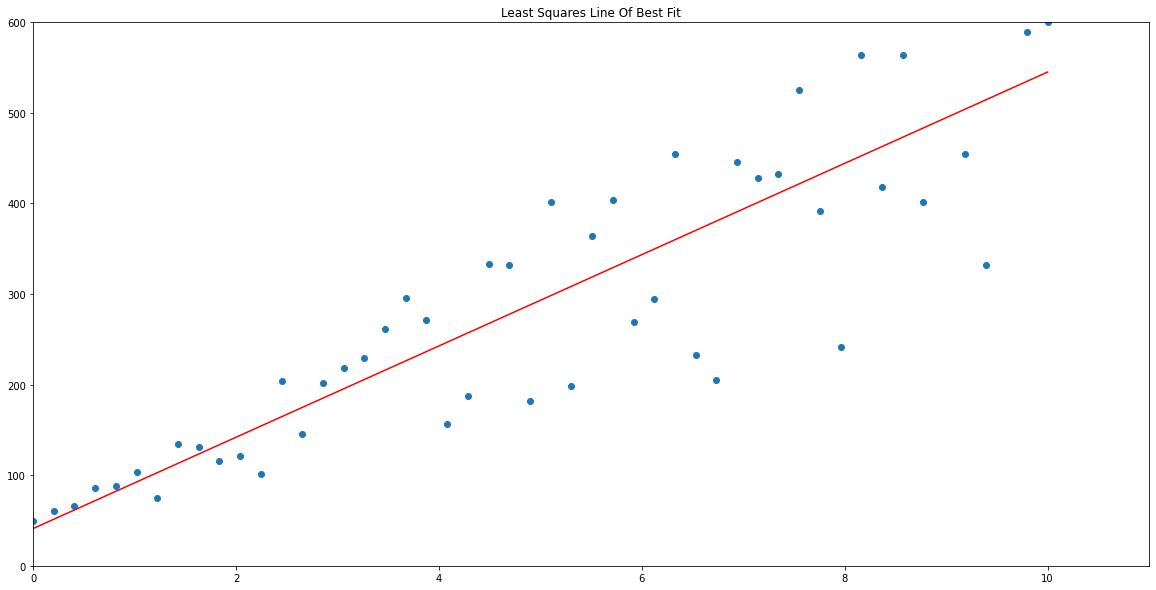

In [497]:
plt.scatter(x, y)
plt.axis([0, 11, 0, 600])

newY2 = gradientLS * x + interceptLS
plt.plot(x, newY2, "r-")
plt.title("Least Squares Line Of Best Fit")

In [495]:
# Lets see the difference between the Gradient Descent and Least Squares calculations for gradient and intercept
df = pd.DataFrame({"Gradient Descent": [featureGrad, intercept], "Least Squares": [gradientLS, interceptLS]})
df['Absolute Error (GD - LS)'] = df['Gradient Descent'] - df['Least Squares']
df['Percentage Error (GD - LS)'] = df['Absolute Error (GD - LS)'] / df['Least Squares'] * 100
df

,Gradient Descent,Least Squares,Absolute Error (GD - LS),Percentage Error (GD - LS)
0,50.389679,50.389100,0.000580,0.001150
1,41.091434,41.095318,-0.003884,-0.009452


In [ ]:
# For multivariate equations that has more than one variables, so say y = mX + mK + C, where X and K are two different variables, we use Partial Derivative/Differentiation.
# Hence we do dy/dx or dy/dk but we can't differentiate with respect to two variables at the same time.